In [1]:
import numpy as np
import mne
from matplotlib import pyplot as plt
import pandas as pd
from helpers import map_ft9, map_ft10, map_avg


In [42]:
bins = 500

In [43]:
# filename = "dataset/chb01/chb01_03.edf"
# raw_data = mne.io.read_raw_edf(filename, preload=True)

In [44]:
# data_ft9, labels_ft9 = map_ft9(raw_data)
# data_ft10, labels_ft10 = map_ft10(raw_data)

In [45]:
# data_ft9.shape, data_ft10.shape

In [46]:
# start_idx = 2996 * 256
# stop_idx = 3036 * 256

In [47]:
# seizure_data_ft9 = np.concatenate([data_ft9[i, start_idx:stop_idx] for i in range(14)])
# seizure_data_ft10 = np.concatenate([data_ft10[i, start_idx:stop_idx] for i in range(14)])

In [48]:
# seizure_data_ft9.shape, seizure_data_ft10.shape, 

In [49]:
# non_seizure_ft9 = []
# for i in range(15):
#     non_seizure_ft9.extend(data_ft9[i, :start_idx])
#     non_seizure_ft9.extend(data_ft9[i, stop_idx:])
# non_seizure_ft9 = np.array(non_seizure_ft9)

# non_seizure_ft10 = []
# for i in range(14):
#     non_seizure_ft10.extend(data_ft10[i, :start_idx])
#     non_seizure_ft10.extend(data_ft10[i, stop_idx:])
# non_seizure_ft10 = np.array(non_seizure_ft10)

In [50]:
# non_seizure_ft9.shape, non_seizure_ft10.shape

In [51]:
# plt.hist(non_seizure_ft9, bins=bins, label="Non-seizure", density=True)
# plt.hist(seizure_data_ft9, bins=bins, label="Seizure", density=True)
# plt.legend()
# plt.title("FT9 as reference")
# plt.xlabel("$\mu$volts")
# plt.ylabel("PDF")
# plt.plot()

In [52]:
# plt.hist(non_seizure_ft10, bins=bins, label="Non-seizure", density=True)
# plt.hist(seizure_data_ft10, bins=bins, label="Seizure", density=True)
# plt.legend()
# plt.title("FT10 as reference")
# plt.xlabel("$\mu$volts")
# plt.ylabel("PDF")
# plt.plot()

# Next to do
- Segment for all the files.
- 

# Segment all data from all files for easier computation

In [53]:
# # filename = "dataset/chb02/chb02_19.edf"
# files = ["dataset/chb01/chb01_03.edf",
#          "dataset/chb01/chb01_04.edf",
#          "dataset/chb01/chb01_15.edf",
#          "dataset/chb01/chb01_16.edf",
#          "dataset/chb01/chb01_18.edf",
#          "dataset/chb01/chb01_21.edf",
#          "dataset/chb01/chb01_26.edf",
#          "dataset/chb02/chb02_16.edf",
#          "dataset/chb02/chb02_16+.edf",
#          "dataset/chb02/chb02_19.edf"]
# # filename = "dataset/chb02/chb02_19.edf"
# start_times = [2996, 1467, 1732, 1015, 1720, 327, 1862, 130, 2972, 3369]
# stop_times = [3036, 1494, 1772, 1066, 1810, 420, 1963, 212, 3053, 3378]
# for filename, start, stop in zip(files, start_times, stop_times):
#     raw_data = mne.io.read_raw_edf(filename, preload=True)

#     start_idx = start * 256
#     stop_idx = stop * 256

#     data_ft9, labels_ft9 = map_ft9(raw_data)
#     data_ft10, labels_ft10 = map_ft10(raw_data)

#     seizure_data_ft9 = np.concatenate([data_ft9[i, start_idx:stop_idx] for i in range(15)])
#     seizure_data_ft10 = np.concatenate([data_ft10[i, start_idx:stop_idx] for i in range(14)])

#     # seizure_data_ft9.shape, seizure_data_ft10.shape, 

#     non_seizure_ft9 = []
#     for i in range(14):
#         non_seizure_ft9.extend(data_ft9[i, :start_idx])
#         non_seizure_ft9.extend(data_ft9[i, stop_idx:])
#     non_seizure_ft9 = np.array(non_seizure_ft9)

#     non_seizure_ft10 = []
#     for i in range(14):
#         non_seizure_ft10.extend(data_ft10[i, :start_idx])
#         non_seizure_ft10.extend(data_ft10[i, stop_idx:])
#     non_seizure_ft10 = np.array(non_seizure_ft10)

#     pd.DataFrame(seizure_data_ft9).to_csv("seizure_data_ft9.csv", mode='a', header=False, index=False, sep=",")
#     pd.DataFrame(non_seizure_ft9).to_csv("non_seizure_data_ft9.csv", mode='a', header=False, index=False, sep=",")
#     pd.DataFrame(seizure_data_ft10).to_csv("seizure_data_ft10.csv", mode='a', header=False, index=False, sep=",")
#     pd.DataFrame(non_seizure_ft10).to_csv("non_seizure_data_ft10.csv", mode='a', header=False, index=False, sep=",")


In [54]:
seizure_data_ft9 = pd.read_csv("seizure_data_ft9.csv", header=None)
non_seizure_data_ft9 = pd.read_csv("non_seizure_data_ft9.csv", header=None)
seizure_data_ft10 = pd.read_csv("seizure_data_ft10.csv", header=None)
non_seizure_data_ft10 = pd.read_csv("non_seizure_data_ft10.csv", header=None)

In [55]:
# plt.hist(non_seizure_data_ft9, bins=bins, label="Non-seizure", density=True)
# plt.hist(seizure_data_ft9, bins=bins, label="Seizure", density=True)
# plt.xlim([-1000, 1000])
# plt.legend()
# plt.title("FT9 as reference")
# plt.xlabel("$\mu$volts")
# plt.ylabel("PDF")
# plt.plot()

[]

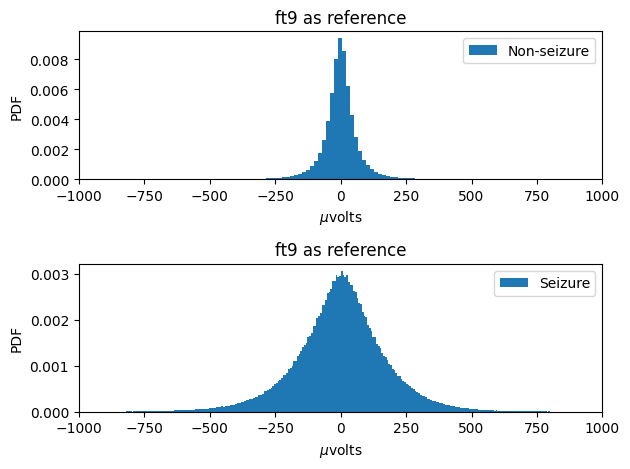

In [56]:
plt.subplot(2,1,1)
plt.hist(non_seizure_data_ft9, bins=bins, label="Non-seizure", density=True)
plt.xlim([-1000, 1000])
plt.legend()
plt.title("ft9 as reference")
plt.xlabel("$\mu$volts")
plt.ylabel("PDF")

plt.subplot(2,1,2)
plt.hist(seizure_data_ft9, bins=bins, label="Seizure", density=True)
plt.xlim([-1000, 1000])
plt.legend()
plt.title("ft9 as reference")
plt.xlabel("$\mu$volts")
plt.ylabel("PDF")
plt.tight_layout()
plt.plot()

In [65]:
print('Reference FT9')
print(f"Mean of seizure = {np.mean(seizure_data_ft9.to_numpy())}, Variance of seizure = {np.var(seizure_data_ft9.to_numpy())}")
print(f"Mean of non-seizure = {np.mean(non_seizure_data_ft9.to_numpy())}, Variance of non-seizure = {np.var(non_seizure_data_ft9.to_numpy())}")

Reference FT9
Mean of seizure = 0.3778002821162422, Variance of seizure = 31703.858876307244
Mean of non-seizure = 0.1677363210200603, Variance of non-seizure = 5967.317804376433


In [57]:
# plt.hist(non_seizure_data_ft10, bins=bins, label="Non-seizure", density=True)
# plt.hist(seizure_data_ft10, bins=bins, label="Seizure", density=True)
# plt.xlim([-1000, 1000])
# plt.legend()
# plt.title("FT10 as reference")
# plt.xlabel("$\mu$volts")
# plt.ylabel("PDF")
# plt.plot()

[]

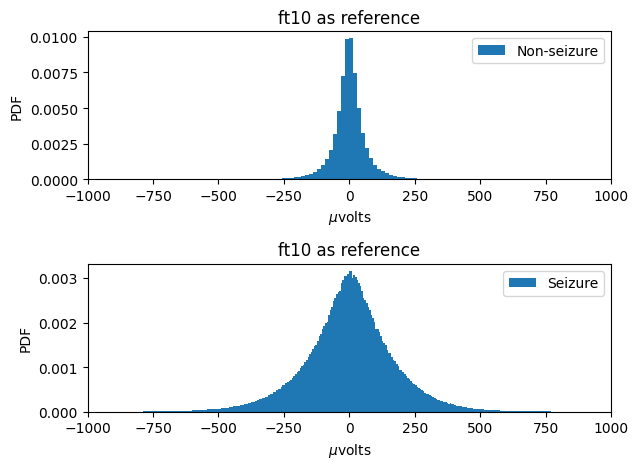

In [58]:
plt.subplot(2,1,1)
plt.hist(non_seizure_data_ft10, bins=bins, label="Non-seizure", density=True)
plt.xlim([-1000, 1000])
plt.legend()
plt.title("ft10 as reference")
plt.xlabel("$\mu$volts")
plt.ylabel("PDF")

plt.subplot(2,1,2)
plt.hist(seizure_data_ft10, bins=bins, label="Seizure", density=True)
plt.xlim([-1000, 1000])
plt.legend()
plt.title("ft10 as reference")
plt.xlabel("$\mu$volts")
plt.ylabel("PDF")
plt.tight_layout()
plt.plot()

In [66]:
print('Reference FT10')
print(f"Mean of seizure = {np.mean(seizure_data_ft10.to_numpy())}, Variance of seizure = {np.var(seizure_data_ft10.to_numpy())}")
print(f"Mean of non-seizure = {np.mean(non_seizure_data_ft10.to_numpy())}, Variance of non-seizure = {np.var(non_seizure_data_ft10.to_numpy())}")

Reference FT10
Mean of seizure = 0.4777238298643596, Variance of seizure = 30448.77154881577
Mean of non-seizure = 0.2406072933275694, Variance of non-seizure = 5252.3145477820635


In [59]:
# files = ["dataset/chb01/chb01_03.edf",
#          "dataset/chb01/chb01_04.edf",
#          "dataset/chb01/chb01_15.edf",
#          "dataset/chb01/chb01_16.edf",
#          "dataset/chb01/chb01_18.edf",
#          "dataset/chb01/chb01_21.edf",
#          "dataset/chb01/chb01_26.edf",
#          "dataset/chb02/chb02_16.edf",
#          "dataset/chb02/chb02_16+.edf",
#          "dataset/chb02/chb02_19.edf"]
# # filename = "dataset/chb02/chb02_19.edf"
# start_times = [2996, 1467, 1732, 1015, 1720, 327, 1862, 130, 2972, 3369]
# stop_times = [3036, 1494, 1772, 1066, 1810, 420, 1963, 212, 3053, 3378]
# for filename, start, stop in zip(files, start_times, stop_times):
#     raw_data = mne.io.read_raw_edf(filename, preload=True)

#     start_idx = start * 256
#     stop_idx = stop * 256

#     data_avg, labels_avg = map_avg(raw_data)

#     seizure_data_avg = np.concatenate([data_avg[i, start_idx:stop_idx] for i in range(23)])

#     # seizure_data_ft9.shape, seizure_data_ft10.shape, 

#     non_seizure_avg = []
#     for i in range(23):
#         non_seizure_avg.extend(data_avg[i, :start_idx])
#         non_seizure_avg.extend(data_avg[i, stop_idx:])
#     non_seizure_avg = np.array(non_seizure_avg)



#     pd.DataFrame(seizure_data_avg).to_csv("seizure_data_avg.csv", mode='a', header=False, index=False, sep=",")
#     pd.DataFrame(non_seizure_avg).to_csv("non_seizure_data_avg.csv", mode='a', header=False, index=False, sep=",")
# # pd.DataFrame(seizure_data_avg).to_csv("seizure_data_avg.csv", mode='a', header=False, index=False, sep=",")
# # pd.DataFrame(non_seizure_avg).to_csv("non_seizure_data_avg.csv", mode='a', header=False, index=False, sep=",")


In [60]:
seizure_data_avg = pd.read_csv("seizure_data_avg.csv", header=None)
non_seizure_data_avg = pd.read_csv("non_seizure_data_avg.csv", header=None)

[]

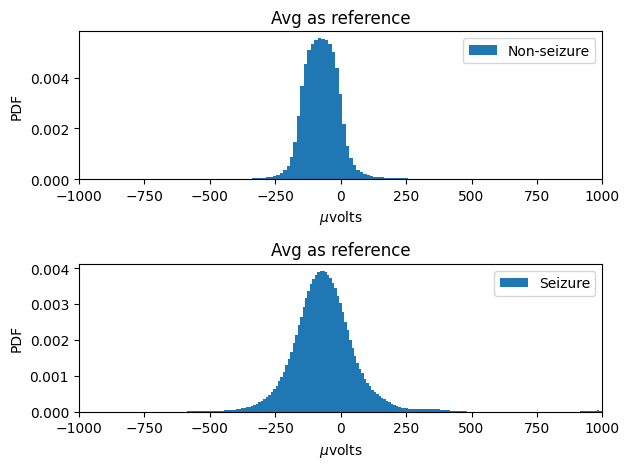

In [61]:
plt.subplot(2,1,1)
plt.hist(non_seizure_data_avg, bins=bins, label="Non-seizure", density=True)
plt.xlim([-1000, 1000])
plt.legend()
plt.title("Avg as reference")
plt.xlabel("$\mu$volts")
plt.ylabel("PDF")

plt.subplot(2,1,2)
plt.hist(seizure_data_avg, bins=bins, label="Seizure", density=True)
plt.xlim([-1000, 1000])
plt.legend()
plt.title("Avg as reference")
plt.xlabel("$\mu$volts")
plt.ylabel("PDF")
plt.tight_layout()
plt.plot()

In [67]:
print('Reference Avg')
print(f"Mean of seizure = {np.mean(seizure_data_avg.to_numpy())}, Variance of seizure = {np.var(seizure_data_avg.to_numpy())}")
print(f"Mean of non-seizure = {np.mean(non_seizure_data_avg.to_numpy())}, Variance of non-seizure = {np.var(non_seizure_data_avg.to_numpy())}")

Reference Avg
Mean of seizure = -0.013287099216854305, Variance of seizure = 152603.48055657558
Mean of non-seizure = -0.0068300794302738645, Variance of non-seizure = 170665.79243645168
